과제 #1은 IRIS 데이터를 아래와 같이 불러와서    
간단한 전처리(스케일링 등)와 EDA를 하고,     
'#1_참고자료.html'을 참고하여 KNN에 GridSearchCV를 적용해보는 과제입니다!   
그리고 BestParameter와 BestScore, TestsetScore를 구합니다.

# Data

기본적으로 데이터를 불러와 데이터 프레임화 시키고, 분석을 위한 tool들을 준비한다. 데이터의 경우, 굳이 데이터프레임화 시키지 않아도 되지만, 전처리 및 EDA에서 좀 더 효율적이라고 생각하기에 데이터 프레임으로 만들었다.

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 아이리스 데이터 불러오기
iris = load_iris()

In [6]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

In [14]:
#iris.data -> features, iris.target -> labels
index = ['Sepal length','Sepal width','Petal length','Petal width']
X = data[index]
y = data['labels']

- About data : https://www.kaggle.com/uciml/iris

In [15]:
X

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int32

굉장히 익숙한 데이터이지만 혹시 모르는 결측치를 위해 확인해본다

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   labels        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [18]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width,labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


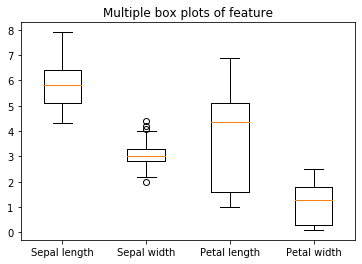

In [23]:
fig, ax = plt.subplots()
ax.boxplot([data['Sepal length'], data['Sepal width'], data['Petal length'], data['Petal width']])
plt.title('Multiple box plots of feature')
plt.xticks([1, 2, 3, 4], ['Sepal length','Sepal width','Petal length','Petal width'])
plt.show()



#출처: https://rfriend.tistory.com/410 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

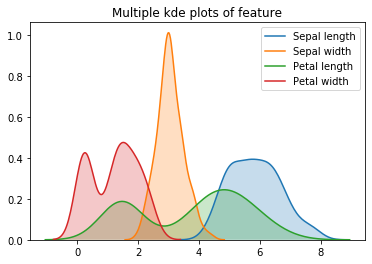

In [29]:
sns.kdeplot(data = data['Sepal length'], shade = True)
sns.kdeplot(data = data['Sepal width'], shade = True)
sns.kdeplot(data = data['Petal length'], shade = True)
sns.kdeplot(data = data['Petal width'], shade = True)
plt.title('Multiple kde plots of feature')
plt.legend()
plt.show()

해당 데이터의 scaling을 진행해야하는지 판단하기 위해서 boxplot과 kdeplot을 한 곳에 모아서 표시했다. 그렇게 크게 min, max들이 차이가 나는 것은 아니어서 굳이 할 필요는 없어보이나, 그래도 scaling하기로 결정했다.

# Train Test 데이터 나누기 & Scaling

In [30]:
# Train, Test 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

- Documentation for "KNeighborsClassifier" : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

위의 그래프에서 scaling을 진행해야 한다고 판단했으므로 아래와 같은 과정을 통해 scaling을 진행한다.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,Sepal length,Sepal width,Petal length,Petal width
0,0.785225,0.320153,0.772211,1.047265
1,-0.265634,-1.299899,0.098281,-0.119965
2,0.434939,0.783025,0.940693,1.436342
3,-0.849444,0.783025,-1.249578,-1.287196
4,-0.382396,-1.762772,0.154442,0.139419


In [34]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test.head()

,Sepal length,Sepal width,Petal length,Petal width
0,-0.148872,-0.374155,0.266764,0.139419
1,0.318177,-0.605591,0.547568,0.009727
2,0.318177,-1.068463,1.053015,0.269112
3,-1.550016,-1.762772,-1.361899,-1.157504
4,0.084653,0.320153,0.603729,0.787881


Scaling이 끝나면 먼저 knn모델을 만들어준다. 만드는 과정은 아래와 같다. 우선 k의 개수를 3으로 고정시키고 predict를 진행한다.

# KNN 모델 생성

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

이후, 만든 모델에 test 데이터를 집어넣어 y_pred를 만든다. 그리고 예측한 데이터와 실제 데이터가 얼마나 잘 맞는지를 accuracy로 파악한다. 

In [39]:
y_pred = knn.predict(X_test)

In [40]:
print('accuracy: ',knn.score(X_test,y_test))

accuracy:  0.9


k = 3일 때, accuracy는 0.9로 나왔다. 이는 기존에 과제로 주어진 파일의 결과값과 약간의 차이가 존재함을 알 수 있다. 그 이유를 생각해봤을 때, 처음 받은 데이터를 scaling하는 과정의 유무에 의해 차이가 발생하는 것으로 추측했다.

# GridSearchCV 적용

knn모델에 GridSearchCV를 적용하여 최적의 값들을 도출하려고 한다. 과정은 아래와 같다. 우선 GridSearchCV를 사용하기 위해 불러온다.

In [42]:
from sklearn.model_selection import GridSearchCV

그리고 아래와 같이 gridsearch를 위한 parameter들의 선택지를 설정해준다. k의 개수, 가중치에 관한 것, 거리를 구하는 방식 등이 이에 해당한다. 이 후, 다음과 같이 gs를 설정해준다.

In [44]:
grid_params = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [45]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
    )

만들어진 gs에 train 데이터를 적합시키면 모델을 학습하는 것을 볼 수 있다. 예시로 보여준 파일과 결과가 다른 이유는 scaling의 유무 차이인 것 같다.

In [46]:
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.9s finished


In [47]:
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [48]:
print("Best Cross_validity Score: {:.3f}".format(gs.best_score_))

Best Cross_validity Score: 0.958


In [49]:
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Test set Score: 0.900


가장 좋은 결과를 도출할 수 있는 grid는 manhattan방식으로 거리를 계산하고 k는 11개, 가중치는 일반 평균인 것으로 나왔다. 그 때 grid_search의 최종 스코어는 0.958로 나왔으며, test 데이터에 grid_search 알고리즘을 적용하면 그 결과 값이 0.9로 도출했다. 

이 역시 예시 파일과는 차이가 존재한다. 오히려 score가 더 높게 나왔는데 이 역시 scaling의 차이라고 볼 수 있다. 